In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm 

In [2]:
pd.options.display.float_format = '{:.6f}'.format
plt.rcParams['figure.figsize'] = [15, 12]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [6]:
df_cust = pd.read_csv('data/customer.csv')
df_cust.sample(5)

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
16,CUSTID17,21000,36,34,1
154,CUSTID155,78000,50,15,1
78,CUSTID79,54000,25,50,1
132,CUSTID133,72000,28,32,1
180,CUSTID181,97000,34,36,1


In [7]:
df_cust.shape

(200, 5)

In [8]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df_cust['Sex'] = df_cust['Sex'].astype('object')

In [10]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [11]:
df_cust.drop('Cust_Number', axis=1, inplace=True)

In [46]:
df_cust.drop(df_cust[[df_cust['Yearly_Income']<130000]].index, axis=0)

ValueError: Item wrong length 1 instead of 200.

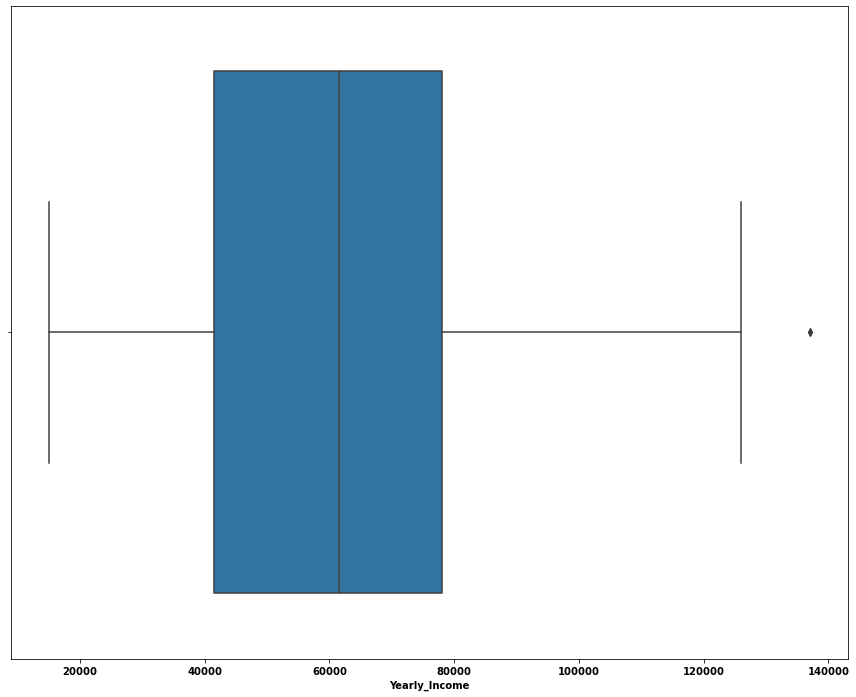

In [12]:
sns.boxplot(x=df_cust['Yearly_Income'])
plt.show()

In [17]:
sc = StandardScaler()
df_cust_sc = sc.fit_transform(df_cust)
df_cust_sc = pd.DataFrame(data=df_cust_sc, columns=df_cust.columns)
df_cust_sc.sample(5)

,Yearly_Income,Age,Cust_Spend_Score,Sex
134,0.474828,-1.145280,-1.708940,-1.128152
15,-1.548152,-1.358753,1.025056,-1.128152
151,0.665675,-0.006760,1.410125,-1.128152
41,-0.861102,-1.287596,1.564153,-1.128152
135,0.474828,-0.789493,1.410125,0.886405


In [27]:
err = []
for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit(df_cust_sc)
    err.append(km.inertia_)

In [28]:
err

[800.0000000000006,
 589.0386579945479,
 477.1252385055332,
 386.6497862962925,
 323.19889684766406,
 275.0449754256046,
 235.72775399218446,
 199.18913514825903,
 173.24042348360823,
 150.76821135204938,
 138.8916936323405,
 123.91493419331627,
 114.34634417827738,
 108.15398750300785]

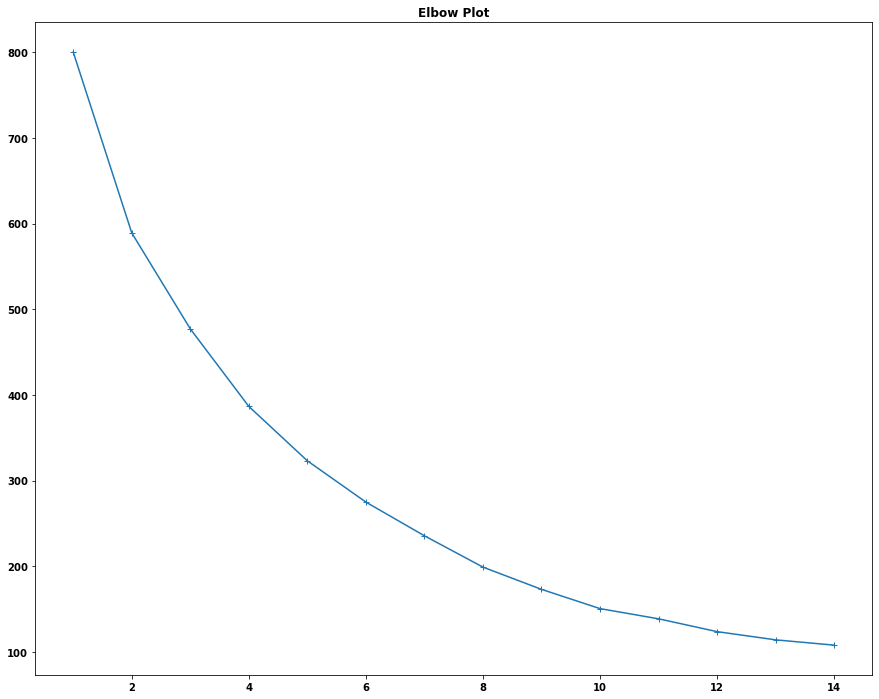

In [29]:
# Elbow plot
plt.plot(range(1, 15), err, marker='+')
plt.title('Elbow Plot')
plt.show()

In [32]:
model_km = KMeans(n_clusters=5, random_state=100)
model_km.fit(df_cust_sc)

KMeans(n_clusters=5, random_state=100)

In [33]:
model_km.labels_

array([3, 3, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 1, 3, 4, 3, 1, 0, 1, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 1, 0, 1, 3, 4, 0, 4, 0, 4, 0, 4, 3, 1, 0,
       4, 0, 4, 0, 0, 0, 4, 3, 0, 1, 4, 1, 4, 1, 0, 1, 1, 3, 4, 4, 1, 3,
       4, 4, 3, 0, 1, 4, 4, 4, 1, 3, 4, 1, 0, 4, 1, 3, 1, 4, 0, 1, 4, 0,
       0, 4, 4, 3, 1, 4, 0, 3, 4, 0, 1, 3, 0, 4, 1, 3, 1, 0, 4, 1, 1, 1,
       1, 0, 4, 3, 0, 0, 4, 4, 4, 4, 3, 4, 0, 3, 0, 0, 2, 3, 1, 3, 2, 3,
       0, 0, 2, 0, 2, 3, 2, 0, 2, 3, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0,
       2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 3])

In [34]:
model_km.cluster_centers_

array([[-0.00501655, -0.73104199,  0.69155779,  0.88640526],
       [-0.51626127,  1.32314977, -0.43422591, -1.12815215],
       [ 1.08669522,  0.10321077, -1.28069535, -0.27349143],
       [ 0.05496398, -0.784156  ,  0.84599827, -1.12815215],
       [-0.54302375,  0.7268403 , -0.4217064 ,  0.88640526]])

In [35]:
df_cust['k_label'] = model_km.labels_

In [36]:
df_cust

,Yearly_Income,Age,Cust_Spend_Score,Sex,k_label
0,15000,18,44,0,3
1,15000,18,79,0,3
2,16000,23,8,1,4
3,16000,25,79,1,0
4,17000,32,41,1,4
...,...,...,...,...,...
195,120000,36,79,1,0
196,126000,46,32,1,2
197,126000,29,72,0,3
198,137000,32,22,0,2


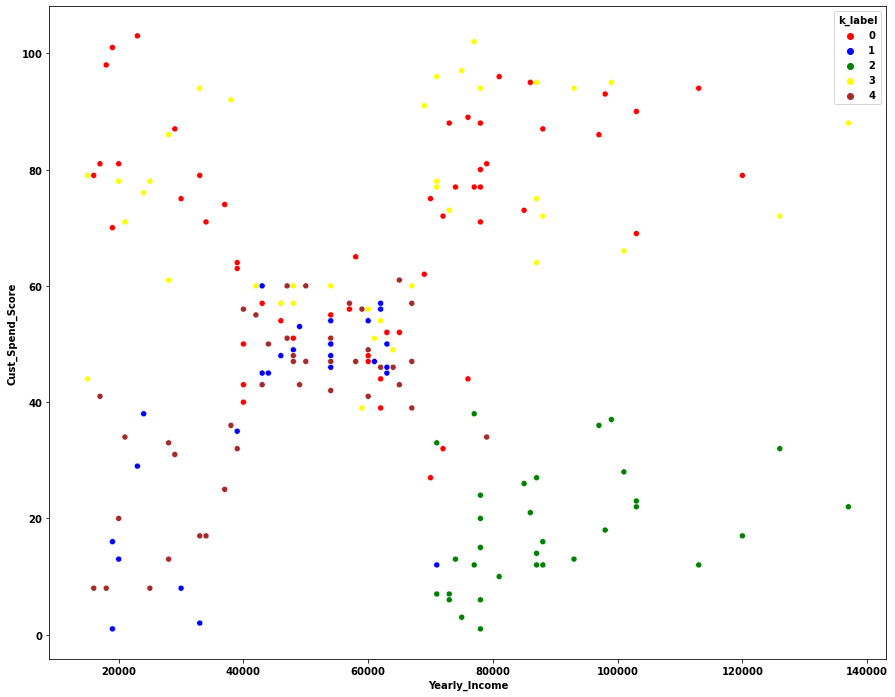

In [37]:
sns.scatterplot(data=df_cust, x=df_cust['Yearly_Income'], y=df_cust['Cust_Spend_Score'], hue=df_cust['k_label'],
               palette=['red', 'blue', 'green', 'yellow', 'brown'])
plt.show()

In [40]:
df_cust[df_cust['k_label']==2].describe()

,Yearly_Income,Age,Cust_Spend_Score,k_label
count,33.000000,33.000000,33.000000,33.000000
mean,89030.303030,40.545455,18.121212,2.000000
std,16493.341172,9.750291,9.996117,0.000000
min,71000.000000,21.000000,1.000000,2.000000
25%,78000.000000,34.000000,12.000000,2.000000
50%,86000.000000,42.000000,16.000000,2.000000
75%,98000.000000,46.000000,24.000000,2.000000
max,137000.000000,58.000000,38.000000,2.000000


In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

In [49]:
model_sil = KMeans(n_clusters=5)
model_sil.fit(df_cust)

KMeans(n_clusters=5)

In [50]:
from sklearn.metrics import silhouette_score

Silhoutte Score for 2 is: 0.5622639680700252


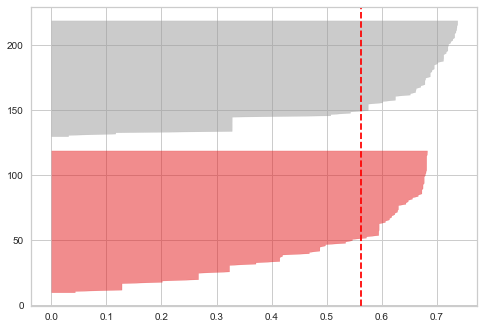

Silhoutte Score for 3 is: 0.5610866501520086


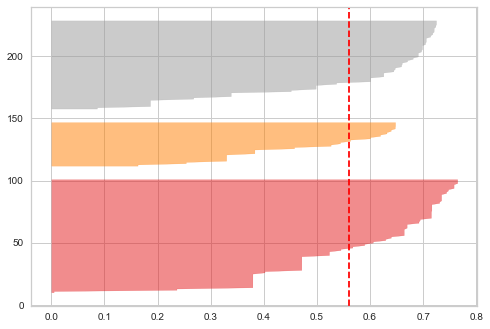

Silhoutte Score for 4 is: 0.5583837966684624


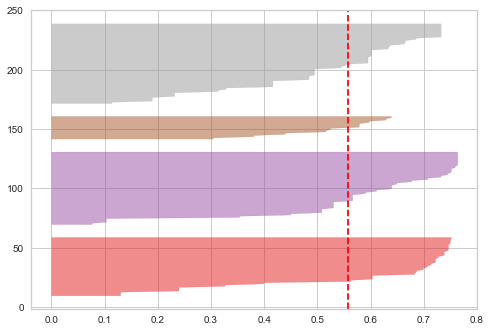

Silhoutte Score for 5 is: 0.5834580456140952


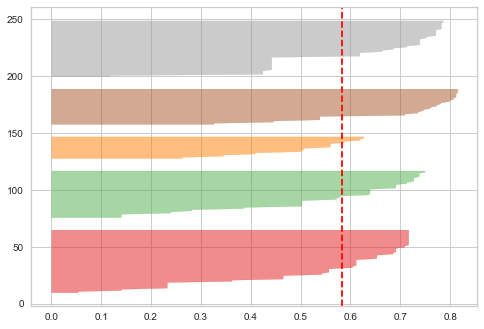

Silhoutte Score for 6 is: 0.6013997508835485


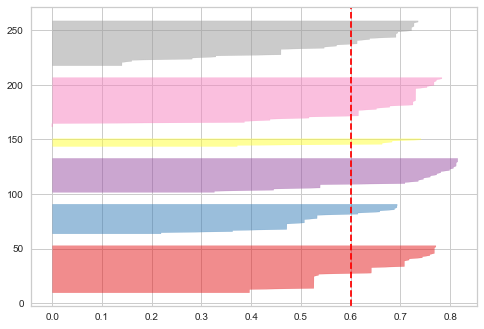

Silhoutte Score for 7 is: 0.6139831598942058


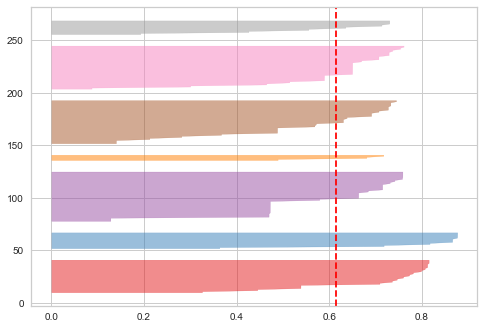

Silhoutte Score for 8 is: 0.6001168973076051


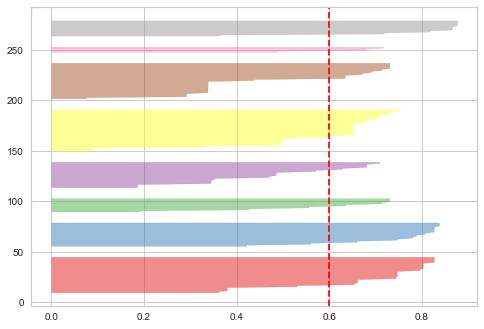

Silhoutte Score for 9 is: 0.6089950989534902


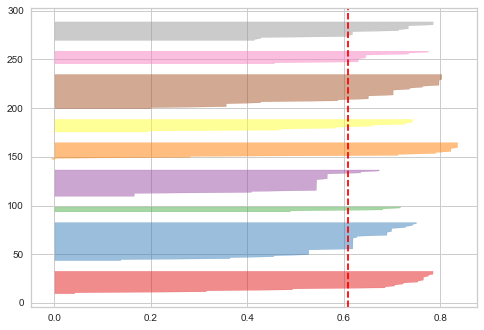

In [52]:
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    km.fit(df_cust)
    sil_score = silhouette_score(df_cust, km.labels_)
    print(f'Silhoutte Score for {i} is: {sil_score}')
    sil_km = SilhouetteVisualizer(km)
    sil_km.fit(df_cust)
    plt.show()